In [ ]:
import numpy as np
from  matplotlib import pyplot as plt
from numpy import asarray
from PIL import Image
import random

img = Image.open('/content/drive/MyDrive/Copy of lenna.bmp')

dat = asarray(img)

b = dat.flatten()


I_bit = list(map(lambda xx : format(xx,'0>8b'), list(b)))


len_I_bit = len(I_bit)


encrypting = 1


In [ ]:
I_bit

['10011000',
 '10011000',
 '10010110',
 '10010110',
 '10011000',
 '10011000',
 '10010100',
 '10010101',
 '10010100',
 '10010000',
 '10010100',
 '10010100',
 '10010000',
 '10010001',
 '10010000',
 '10010000',
 '10001111',
 '10001110',
 '10010000',
 '10010001',
 '10010001',
 '10010110',
 '10011010',
 '10011100',
 '10011110',
 '10100001',
 '10100110',
 '10100100',
 '10100100',
 '10100010',
 '10100100',
 '10011011',
 '10010100',
 '10001010',
 '10000101',
 '01110001',
 '01011111',
 '01001010',
 '01000000',
 '00110110',
 '00111010',
 '01000111',
 '01000101',
 '01001010',
 '01001011',
 '01001101',
 '01010010',
 '01010010',
 '01001111',
 '01001111',
 '01010011',
 '01010011',
 '01010010',
 '01010010',
 '01010101',
 '01010011',
 '01010101',
 '01010101',
 '01010000',
 '01001111',
 '01010010',
 '01010101',
 '01011001',
 '01011011',
 '01100010',
 '01100000',
 '01100011',
 '01100111',
 '01100111',
 '01100110',
 '01101100',
 '01110000',
 '01101010',
 '01101110',
 '01110100',
 '01110100',
 '01110100',

In [ ]:
import hashlib
import math

def pwlcm(x_n,p):                                                     #pwlcm function definition
    x_n_1 = x_n
    if(0 <= x_n < p):
        x_n_1 = x_n/p
    elif(p < x_n <= 0.5):
        x_n_1 = (x_n - p)/(0.5 - p)
    elif(0.5 < x_n <= 1):
        x_n_1 = pwlcm(1-x_n,p)

    return x_n_1


key = "THISISTESTWORDFORTHEKEY"                                   #key value

hash = hashlib.sha256(key.encode())                               #converts the string to stream of bytes for storing in computer

x = hash.hexdigest()                                              #converts the string of binary bytes to string of hexadecimal digits


x_int = int(x,base=16)                                            #converts the hexadecimal string to its decimal equivalent
x_bin = format(x_int,'0>256b')                                    #converts the decimal to binary of length 256 bits



h1 = int(x_bin[0:64],2)                                           #store the first 64 bits decimal equivalent in h1
h2 = int(x_bin[64:128],2)                                         #store the last 64 bits decimal equivalent in h2

x_1 = h1/10**15 % 1

p = h2/10**15 % 1

X = [x_1]                                                         #X is the pwlcm sequence initialised with x_1

x_i = x_1

n = len_I_bit
for i in range(1,n):
    x_i = pwlcm(X[i-1],p)                                         #finding the pwlcm value for each element
    X.append(x_i)                                                 #putting that value in the sequence

X_1 = list(map(lambda aa : math.floor(aa*10**15), X))

S_rule = list(map(lambda srule : srule % 8, X_1))                 #DNA rule-select sequence

print(len(S_rule))
print('S_rule: ',S_rule)

90000
S_rule:  [5, 0, 3, 3, 2, 5, 1, 3, 3, 4, 4, 7, 5, 0, 6, 1, 7, 4, 2, 4, 3, 3, 7, 5, 1, 1, 0, 5, 1, 3, 3, 2, 2, 6, 2, 2, 3, 1, 2, 0, 0, 0, 2, 3, 6, 2, 7, 5, 1, 7, 5, 4, 3, 4, 6, 2, 6, 6, 6, 1, 3, 7, 1, 1, 7, 6, 3, 7, 4, 2, 0, 1, 5, 5, 0, 4, 1, 5, 0, 7, 1, 0, 7, 4, 1, 7, 6, 3, 4, 4, 7, 2, 7, 2, 1, 4, 0, 4, 4, 6, 6, 5, 7, 2, 3, 3, 6, 2, 3, 1, 5, 7, 5, 0, 7, 7, 7, 3, 1, 3, 5, 3, 3, 3, 1, 3, 1, 7, 5, 7, 6, 6, 2, 2, 6, 1, 4, 4, 6, 3, 0, 0, 3, 5, 4, 6, 1, 4, 1, 7, 5, 2, 2, 2, 0, 4, 1, 3, 7, 6, 5, 6, 1, 2, 5, 2, 3, 5, 2, 0, 6, 7, 7, 5, 5, 5, 4, 6, 0, 6, 0, 7, 1, 6, 7, 0, 0, 5, 7, 7, 5, 6, 3, 6, 4, 0, 5, 1, 2, 7, 0, 1, 6, 6, 6, 5, 3, 6, 5, 1, 4, 3, 4, 0, 1, 7, 0, 5, 6, 6, 1, 1, 5, 3, 2, 7, 6, 1, 1, 3, 6, 0, 5, 2, 3, 7, 1, 0, 0, 2, 7, 4, 3, 3, 3, 5, 3, 6, 4, 0, 1, 3, 5, 3, 3, 7, 5, 6, 3, 1, 1, 2, 5, 2, 2, 4, 6, 5, 5, 6, 3, 3, 0, 4, 1, 2, 5, 2, 1, 1, 6, 2, 7, 2, 0, 0, 3, 6, 3, 1, 4, 6, 3, 5, 3, 6, 5, 5, 7, 5, 3, 0, 3, 0, 7, 6, 2, 3, 1, 7, 2, 0, 6, 4, 6, 0, 4, 5, 5, 0, 4, 2, 6, 4, 1, 6, 0, 7, 

In [ ]:
DNA_rule0 = {'00':'A', '10':'C', '01':'G', '11':'T'}                    #rules corresponding to different compositions of DNA
DNA_rule1 = {'00':'A', '01':'C', '10':'G', '11':'T'}
DNA_rule2 = {'11':'A', '10':'C', '01':'G', '00':'T'}
DNA_rule3 = {'11':'A', '01':'C', '10':'G', '00':'T'}
DNA_rule4 = {'10':'A', '00':'C', '11':'G', '01':'T'}
DNA_rule5 = {'01':'A', '00':'C', '11':'G', '10':'T'}
DNA_rule6 = {'10':'A', '11':'C', '00':'G', '01':'T'}
DNA_rule7 = {'01':'A', '11':'C', '00':'G', '10':'T'}

DNA_rule_table = {0: DNA_rule0,
                  1: DNA_rule1,
                  2: DNA_rule2,
                  3: DNA_rule3,
                  4: DNA_rule4,
                  5: DNA_rule5,
                  6: DNA_rule6,
                  7: DNA_rule7}

def enc_seq(d,seq):                                                #function for generating encoded sequence
    enc_seq = ''
    for i in range(0,len(seq)-1,2):
        enc_seq = enc_seq + d[seq[i:i+2]]                          #encoding 2 adjacent pixels at a time

    return enc_seq                                                 #return encoded sequence

S1 = []
for i in range(len(I_bit)):
    modified_seq = enc_seq(DNA_rule_table[S_rule[i]], I_bit[i])
    S1.append(modified_seq)

print('S1: ',S1)

S1:  ['TATC', 'CGCA', 'GCCG', 'GCCG', 'CGCT', 'TATC', 'GCCA', 'GCCC', 'GCCT', 'ATCC', 'ATTC', 'TAAG', 'TACC', 'CGAG', 'ATGG', 'GCAA', 'TGCC', 'ACGA', 'CGTT', 'ATCT', 'GCTC', 'GCCG', 'TATT', 'TAGC', 'GCTG', 'GGAC', 'CCGC', 'TTAC', 'GGCA', 'GGTG', 'GGCT', 'CGCA', 'CGGT', 'AGAA', 'CTGG', 'GATG', 'CCAA', 'CAGG', 'GTTT', 'ATGC', 'ATCC', 'GAGT', 'GTGG', 'CTGG', 'TGAC', 'GTAG', 'AAGT', 'AACT', 'CATT', 'AGCC', 'AACG', 'TTCG', 'CCTG', 'TTCA', 'TTTT', 'GGTA', 'TTTT', 'TTTT', 'TTGG', 'CATT', 'CCTG', 'AAAA', 'CCGC', 'CCGT', 'ATGT', 'TAGG', 'CGTA', 'ATAC', 'TATG', 'GCGC', 'GCTA', 'CTAA', 'ATTT', 'ATGT', 'GTGA', 'TGTC', 'CTCA', 'AGCA', 'GTAG', 'ACGG', 'CTGA', 'GTGG', 'ACGT', 'TGCT', 'CTAG', 'ATCT', 'TCGG', 'CATG', 'TGCC', 'TGCT', 'ACGG', 'GAGT', 'ACAT', 'GAGG', 'CTCA', 'TGTT', 'GTGG', 'TGTA', 'TGTA', 'TCTT', 'TCAG', 'AGAT', 'ACAT', 'GAGC', 'CACC', 'CACT', 'TCTG', 'GAGT', 'CACG', 'CTGA', 'AGAC', 'ACAG', 'AGAA', 'GTGC', 'ACAT', 'ACTG', 'ACTG', 'CAGT', 'CTCC', 'CAGT', 'AGTC', 'CACC', 'CACG', 'CACG', 'C

In [ ]:
a = 10                                                     #values of a,b,c,r,h are optimised for chaotic system
b = 8/3
c = 28
r = -1
h = 0.01

def HCLS(xi,yi,zi,wi):                                     #HCLS function

    K11 = a*(yi - xi) + wi
    K12 = a*(yi - (xi + ((h/2)*K11))) + wi
    K13 = a*(yi - (xi + ((h/2)*K12))) + wi
    K14 = a*(yi - (xi + h*K13)) + wi

    x_ip1 = xi + (h/6)*(K11 + 2*K12 + 2*K13 + K14)         #x(i+1)

    K21 = c*x_ip1 - yi - x_ip1*zi
    K22 = c*x_ip1 - (yi + (h/2)*K21) - x_ip1*zi
    K23 = c*x_ip1 - (yi + (h/2)*K22) - x_ip1*zi
    K24 = c*x_ip1 - (yi + h*K23) - x_ip1*zi

    y_ip1 = yi + (h/6)*(K21 + 2*K22 + 2*K23 + K24)         #y(i+1)

    K31 = x_ip1*y_ip1 - b*zi
    K32 = x_ip1*y_ip1 - b*(zi + (h/2)*K31)
    K33 = x_ip1*y_ip1 - b*(zi + (h/2)*K32)
    K34 = x_ip1*y_ip1 - b*(zi + h*K31)

    z_ip1 = zi + (h/6)*(K31 + 2*K32 + 2*K33 + K34)             #z(i+1)

    K41 = -1*y_ip1*z_ip1 + r*wi
    K42 = -1*y_ip1*z_ip1 + r*(wi + (h/2)*K41)
    K43 = -1*y_ip1*z_ip1 + r*(wi + (h/2)*K42)
    K44 = -1*y_ip1*z_ip1 + r*(wi + h*K43)

    w_ip1 = wi + (h/6)*(K41 + 2*K42 + 2*K43 + K44)             #w(i+1)

    return x_ip1,y_ip1,z_ip1,w_ip1


**PERMUTATION PROCESS**

In [ ]:
def TA(a,b):                                                                    #function for generating DNA ADD sequence
    TA_res = ''

    TA_d = {'A': {'A': 'T', 'C': 'A', 'G': 'C', 'T': 'G'},
        'C': {'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T'},
        'G': {'A': 'C', 'C': 'G', 'G': 'T', 'T': 'A'},
        'T': {'A': 'G', 'C': 'T', 'G': 'A', 'T': 'C'}}

    if(len(a) != len(b)):
        print("a,b not suitable for TA")
    else:
        for i in range(len(a)):
            TA_res+=TA_d[a[i]][b[i]]


    return TA_res


def TX(a,b):                                                                    #function for generating DNA XOR sequence
    TX_res = ''

    TX_d = {'A': {'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T'},
        'C': {'A': 'C', 'C': 'A', 'G': 'T', 'T': 'G'},
        'G': {'A': 'G', 'C': 'T', 'G': 'A', 'T': 'C'},
        'T': {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}}

    if(len(a) != len(b)):
        print("a,b not suitable for TX")
    else:
        for i in range(len(a)):
            TX_res += TX_d[a[i]][b[i]]

    return TX_res

def TS(a,b):                                                                    #function for generating DNA SUB sequence
    TS_res = ''

    TS_d = {'A': {'A': 'C', 'C': 'A', 'G': 'T', 'T': 'G'},
        'C': {'A': 'G', 'C': 'C', 'G': 'A', 'T': 'T'},
        'G': {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'},
        'T': {'A': 'A', 'C': 'T', 'G': 'G', 'T': 'C'}}

    if(len(a) != len(b)):
        print("a,b not suitable for TS")
    else:
        for i in range(len(a)):
            TS_res += TS_d[a[i]][b[i]]

    return TS_res

len_s1 = len(S1)

AR = S1[0]
XR = S1[0]

for i in range(1,len_s1):
    AR = TA(AR,S1[i])
    XR = TX(XR,S1[i])




HASH_D1 = (hashlib.sha256((AR+XR).encode()).hexdigest())        #hexadecimal stream of the concatenated string AR+XR
HASH_D = int(HASH_D1,base=16)                                   #converting it into integer

HASH_DK = HASH_D ^ x_int                                        #HASH(DK)=HASH(D) XOR HASH(K)

HASH_DK_bin = '{0:b}'.format(HASH_DK)                           #converting to binary number of 256 bits


A1 = int(HASH_DK_bin[0:64],2)                                   #storing the bits of HASH(DK) into A1,A2,A3,A4 with a space of 64 bits converted into decimal
A2 = int(HASH_DK_bin[64:128],2)
A3 = int(HASH_DK_bin[128:192],2)
A4 = int(HASH_DK_bin[192:256],2)


x1 = ((int(A1/10**8) % 80) - 40) + ((A1/10**14) - int(A1/10**14))    #finding values of x1,y1,z1,w1

y1 = ((int(A2/10**8) % 80) - 40) + ((A2/10**14) - int(A2/10**14))

z1 = ((int(A1/10**8) % 80) + 1) + ((A1/10**14) - int(A1/10**14))

w1 = ((int(A1/10**8) % 500) - 250) + ((A1/10**14) - int(A1/10**14))

X_2 = []
x_i,y_i,z_i,w_i = HCLS(x1, y1, z1, w1)
X_2.append(x1)

for i in range(len(S1)-1):
    x_i_1,y_i_1,z_i_1,w_i_1 = HCLS(x_i,y_i,z_i,w_i)
    X_2.append(x_i_1)
    x_i,y_i,z_i,w_i = x_i_1,y_i_1,z_i_1,w_i_1


Sp = []
for i in X_2:
    Sp.append((math.floor(i*(10**15))) % n)


m = 0                                                     #for encryption process
n1 = int(len_I_bit/2)

if(encrypting):
    for k in range(m,n1):
        S1[Sp[k]],S1[Sp[len_I_bit-1 - k]] = S1[Sp[len_I_bit-1 - k]], S1[Sp[k]]

else:
    for k in range(n1-1,m-1,-1):
        S1[Sp[k]],S1[Sp[len_I_bit-1 - k]] = S1[Sp[len_I_bit-1 - k]], S1[Sp[k]]


Sp1 = S1

In [ ]:
print(Sp1)

['TATC', 'CGCA', 'GCCG', 'GCCG', 'AGTT', 'AAAA', 'GCCA', 'CTGG', 'GCCT', 'ATCC', 'TCAG', 'TAAG', 'GTAC', 'CGAG', 'TACC', 'GCAA', 'TGCC', 'GTGG', 'CCGG', 'ACGC', 'GCTC', 'GCCG', 'TATT', 'TAGC', 'ATGC', 'AGTG', 'GGTA', 'TTAC', 'GGGG', 'GGGG', 'CAGC', 'TACC', 'CGGT', 'CCCC', 'CGGG', 'GATG', 'GGGG', 'CAGG', 'TTAG', 'CTCC', 'AGGC', 'CGGG', 'AAAA', 'CTGG', 'CCCC', 'AAAA', 'AAGT', 'AGTT', 'GGGG', 'AAAA', 'GTCC', 'GGGG', 'GGCA', 'AGCC', 'CGCG', 'GGTA', 'TTTT', 'ACCG', 'TTGG', 'GGGG', 'CCAA', 'AAAA', 'TCAG', 'CCCC', 'TCGT', 'TAGG', 'CGTA', 'ATAC', 'TATG', 'GCGC', 'GTGG', 'CTAA', 'ATTT', 'ATGT', 'GTGA', 'TGTC', 'CTTT', 'AGCA', 'CGAG', 'ACGG', 'GACT', 'GTGG', 'CCCC', 'TACT', 'GGGG', 'ATCT', 'AAAA', 'CATG', 'ATCT', 'TACA', 'CTAG', 'GAGT', 'CAAG', 'TCTG', 'CCCC', 'TGTT', 'GTGG', 'TACA', 'ATTA', 'TCTT', 'AGGA', 'AAAA', 'GCGA', 'GAGC', 'CCCA', 'CACT', 'GGAT', 'ATGA', 'ATGC', 'ATTT', 'AGAC', 'TAAA', 'GGGG', 'TAGT', 'GCTG', 'ACTG', 'GAAC', 'CAGT', 'GCCG', 'CAGT', 'GTTT', 'CACC', 'GTCG', 'CACG', 'CTAT',

**DIFFUSION PROCESS**

In [ ]:
H1 = h1                                              #the variables H1,H2 are same as the variables h1,h2 from the permutation process
H2 = h2

x1 = (H1/10**15) % 1
p = (H2/10**15) % 1

#X already created above in the permutation process

# Y = (math.floor(X * 10**15) % 256)

Y = []
for i in X:
    Y.append((math.floor(i*10**15)) % 256)

Y_bit = list(map(lambda xx : format(xx,'0>8b'), list(Y)))                       #converting to binary list

S_key = []                                                                      #diffusion control sequence

for i in range(len_I_bit):
    S_key_i = enc_seq(DNA_rule_table[S_rule[i]], Y_bit[i])
    S_key.append(S_key_i)


D = [0]*len_I_bit                                                               #initialising D with 0's

if(encrypting):
    D[0] = TA(Sp1[0],S_key[0])
    D[0] = TX(D[0],S_key[0])

    for i in range(1,len_I_bit):
        if((i % 2) == 1):
            D[i] = TX(Sp1[i], S_key[i])
            D[i] = TX(D[i], D[i-1])
        else:
            D[i] = TA(Sp1[i], S_key[i])
            D[i] = TX(D[i], D[i-1])


else:
    for i in range(len_I_bit-1,0,-1):
        if(((len_I_bit-i) % 2) == 1):
            D[(i)] = TX(Sp1[(i)], S_key[(i)])
            D[(i)] = TX(D[(i)], Sp1[(i)-1])
        else:
            D[(i)] = TA(Sp1[(i)], Sp1[(i)])
            D[(i)] = TX(D[(i)], S_key[(i)-1])

    D[0] = TX((TA(Sp1[0],S_key[0])),S_key[0])



In [ ]:
print(D)

['GCGA', 'AGGA', 'GGCC', 'AATT', 'GAAA', 'TGAA', 'AGGA', 'TTGG', 'GCCA', 'CGGA', 'AGTG', 'CGTC', 'TAGC', 'GAGT', 'CGCT', 'CTCG', 'ATCT', 'GGAA', 'GGAG', 'GTCG', 'CACG', 'AGTA', 'CCAT', 'CGGG', 'AGTT', 'CTAA', 'CTTT', 'CTTG', 'CGAA', 'ACCG', 'CTCG', 'GGCG', 'TTCC', 'AGTA', 'TCTG', 'GACC', 'TACA', 'TCTT', 'GCTC', 'CAGA', 'ACAA', 'CAGG', 'AAAG', 'AGCA', 'GGGA', 'ACTC', 'CGGG', 'TACC', 'GCGT', 'CCTG', 'GACG', 'ACAC', 'ACTG', 'TGAG', 'GCCT', 'AACG', 'CTGA', 'AGAG', 'TCAT', 'CCGA', 'GCAT', 'TTAG', 'CGTA', 'GCAA', 'TGGT', 'CTTC', 'ATTG', 'CTTG', 'TCTA', 'CCAA', 'AGCC', 'TCCA', 'AGCG', 'CTCC', 'CTTG', 'GGTG', 'GACC', 'TCGC', 'TGGA', 'GGAT', 'CTGA', 'GCCG', 'CACT', 'TCGC', 'CTCT', 'ACAC', 'TAGG', 'AAGA', 'CGAT', 'ACGG', 'CGGA', 'GACG', 'ACCA', 'ACTT', 'GGTG', 'CGGA', 'TGAC', 'CATA', 'CCTA', 'CACT', 'GTTA', 'TTTA', 'TGCA', 'GGGA', 'TCCT', 'AGTA', 'AACG', 'ATAT', 'TAAT', 'GACC', 'TGGC', 'ATTA', 'CGGC', 'ACAG', 'CGTA', 'CGCT', 'GGCG', 'AAAC', 'ATAT', 'AGAA', 'TCGG', 'CTCT', 'GCGG', 'AAAA', 'AGCT',

**DNA DECODING**

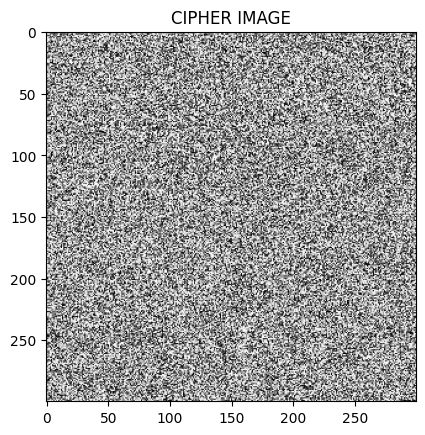

In [ ]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
        if val == value:
            return key

    return "key doesn't exist"

cipher = []
cipher_bit = []
for i in range(len_I_bit):
    ans=''
    for ii in D[i]:
        ans+=get_key(DNA_rule_table[S_rule[i]],ii)
    cipher_bit.append(ans)
    cipher.append(int(ans,base=2))


cipher2 = []
for i in range(0,len(cipher),300):
    cipher2.append(cipher[i:i+300])


cipher3 = asarray(cipher2)

cipher_img = Image.fromarray(np.uint8(cipher3)).convert('L')
plt.imshow(cipher_img,cmap='Greys')
plt.title('CIPHER IMAGE')
plt.show()
cipher_img.save('/content/drive/MyDrive/GC_cipher_img.bmp')